In [88]:
import openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
file_name = 'LEADS_ver1.xlsx'
linkedIn = pd.read_excel(file_name, engine = "openpyxl", sheet_name = 'linkedin')

In [90]:
linkedIn.describe()

,connectionsCount,followersCount,connectionDegree,pageNumber,isAdmin,followerCount,founded,mainCompanyID,industryCode,employeesOnLinkedIn,siren,siret,siret_zip
count,20.000000,20.000000,20.000000,20.000000,8.0,8.000000,7.000000,8.000000e+00,8.000000,8.000000,2.000000e+00,2.000000e+00,2.000000
mean,487.950000,5267.450000,2.950000,2.100000,0.0,3468.125000,2008.142857,8.892362e+06,54.250000,292.000000,8.158744e+08,8.158744e+13,45250.000000
std,42.115724,7561.198502,0.223607,1.020836,0.0,5129.361014,5.871643,1.166607e+07,28.991378,709.009974,2.190712e+07,2.190712e+12,20859.650045
min,318.000000,317.000000,2.000000,1.000000,0.0,25.000000,2000.000000,3.682980e+05,44.000000,2.000000,8.003837e+08,8.003837e+13,30500.000000
25%,500.000000,1404.250000,3.000000,1.000000,0.0,116.750000,2005.500000,1.954547e+06,44.000000,3.750000,8.081290e+08,8.081290e+13,37875.000000
50%,500.000000,2198.000000,3.000000,2.000000,0.0,642.500000,2008.000000,3.210950e+06,44.000000,19.500000,8.158744e+08,8.158744e+13,45250.000000
75%,500.000000,4656.500000,3.000000,3.000000,0.0,4966.000000,2009.500000,1.245431e+07,44.000000,118.500000,8.236197e+08,8.236197e+13,52625.000000
max,500.000000,30141.000000,3.000000,4.000000,0.0,13430.000000,2019.000000,3.474600e+07,126.000000,2042.000000,8.313651e+08,8.313651e+13,60000.000000


In [123]:
df = linkedIn[
    ['fullName',
    'connectionsCount',
    'followersCount',
    'country',
    'twitter',
    'civility',
    'linkedInUrl'
    ]
]

In [124]:
df.head(20)

,fullName,connectionsCount,followersCount,country,twitter,civility,linkedInUrl
0,jim penn,318,317,United States,NaN,NaN,https://www.linkedin.com/in/jim-penn-142b155a/
1,Beth Littlejohn,500,1165,United States,NaN,Mrs,https://www.linkedin.com/in/homeagent/
2,Anthony Soto,500,2206,United States,NaN,Mr,https://www.linkedin.com/in/anthony-soto-a3389...
3,Andrea Ruffino,500,4670,NaN,NaN,NaN,https://www.linkedin.com/in/andrea-ruffino-2ab...
4,"Jacqueline (Jackie) Roeder, Owner",500,2190,United States,BalanceBooksLLC,NaN,https://www.linkedin.com/in/jackieroeder/
5,Bharat Singh,500,2423,India,instantestates,Mr,https://www.linkedin.com/in/instantproperties/
6,Nelson Wangwabi Mandela,500,728,NaN,NaN,Mr,https://www.linkedin.com/in/nelson-wangwabi-ma...
7,Siv Hartvigsen,500,12164,NaN,sivhart2006,Mrs,https://www.linkedin.com/in/siv-hartvigsen-7bb...
8,Kathleen Holmes Cates,441,443,United States,NaN,NaN,https://www.linkedin.com/in/kathleen-holmes-ca...
9,Sudhir Suryavanshi,500,30141,India,phoenixind,Mr,https://www.linkedin.com/in/phoenixindustries/


In [131]:
df = df.rename(columns = {'civility' : 'gender'})
df['gender'] = df['gender'].replace(np.nan, 'not sure')
df['gender'] = df['gender'].replace('Mr', 'male')
df['gender'] = df['gender'].replace('Mrs', 'female')
# print(df.gender)


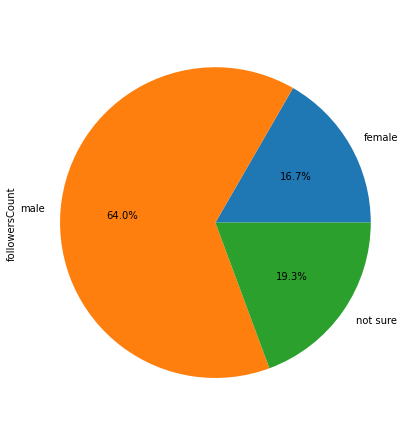

In [149]:
data = df.groupby("gender")['followersCount'].sum()
# data
fig, ax = plt.subplots(figsize = (6,6))
f = data.plot.pie(autopct = "%.1f%%")
f.set_title('Followers Distribution', color = 'white', size = 22)
plt.tight_layout()

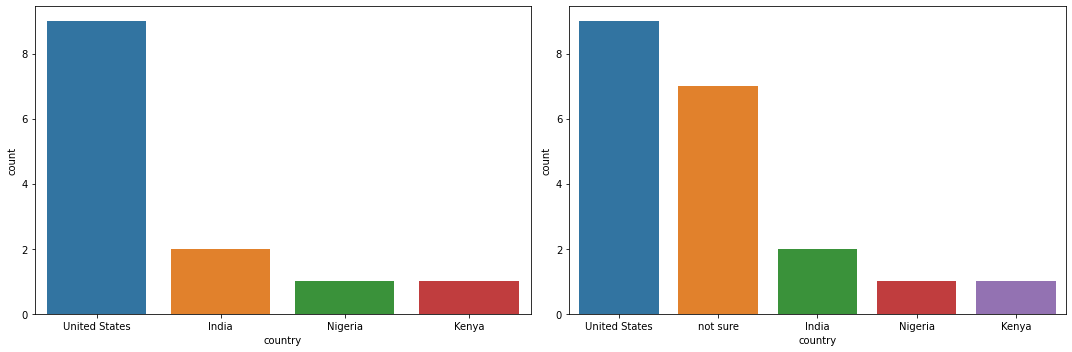

In [93]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(df['country'], ax = axs[0])
test1 = df['country'].replace(np.nan, 'not sure')
plt2 = sns.countplot(test1, ax = axs[1])
plt.tight_layout()
# fig.show()

In [94]:
followers = {
    '0-100' : 0,
    '100-500' : 0,
    '500-1000' : 0,
    '1000-5000' : 0,
    '>5000' : 0
}

for i in df['followersCount']:
    # i = int(i)
    if i < 100:
        followers['0-100'] += 1
    elif i >= 100 and i < 500:
        followers['100-500'] += 1
    elif i >= 500 and i < 1000:
        followers['500-1000'] += 1
    elif i >= 1000 and i < 5000:
        followers['1000-5000'] += 1
    else:
        followers['>5000'] += 1

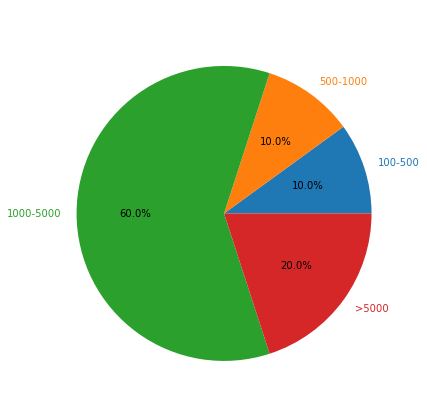

In [122]:
f = [int(followers[y]) for y in followers if followers[y] != 0 ]
g = [y for y in followers if followers[y] != 0]
fig, ax = plt.subplots(figsize = (6,6))
patches, texts, pcts = ax.pie(f, labels = g, autopct = '%.1f%%')
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
ax.set_title('Followers Count', color = 'white', fontsize = 22)
plt.tight_layout()
# plt.pie(f, labels = g)